# Importaci√≥n de Librerias

In [1]:
# An√°lisis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Gr√°ficos
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

---

In [2]:
!dir

 Volume in drive C is Primary
 Volume Serial Number is BE88-FD3B

 Directory of C:\Users\noroot\Desktop\precio-inmueble-ml

08/23/2025  02:13 PM    <DIR>          .
08/23/2025  02:13 PM    <DIR>          ..
08/23/2025  01:37 PM                17 .gitignore
08/23/2025  02:13 PM    <DIR>          .ipynb_checkpoints
08/23/2025  01:46 PM    <DIR>          .venta
08/23/2025  01:39 PM    <DIR>          BELLAVISTA
08/23/2025  02:10 PM           341,263 dataset_bellavista.ipynb
08/23/2025  02:07 PM             1,105 dataset_bellavista.pkl
08/23/2025  01:39 PM            30,149 dataset_bellavista.xlsx
08/23/2025  02:12 PM           341,263 dataset_los_olivos.ipynb
08/23/2025  01:39 PM            68,780 dataset_los_olivos.xlsx
08/23/2025  01:39 PM           137,250 dataset_magdalena.xlsx
08/23/2025  01:39 PM    <DIR>          MAGDALENA
               7 File(s)        919,827 bytes
               6 Dir(s)  45,659,996,160 bytes free


In [3]:
# lectura del archivo excel
df = pd.read_excel("dataset_los_olivos.xlsx")

In [4]:
filas, columnas = df.shape
print("N√∫mero de filas:", filas)
print("N√∫mero de columnas:", columnas)

N√∫mero de filas: 1081
N√∫mero de columnas: 12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   A√±o                           1081 non-null   int64  
 1   Trimestre                     1081 non-null   int64  
 2   Precio en d√≥lares corrientes  1081 non-null   float64
 3   Tipo de cambio                1081 non-null   float64
 4   Distrito                      1081 non-null   object 
 5   Superficie                    1081 non-null   int64  
 6   N√∫mero de habitaciones        1081 non-null   int64  
 7   N√∫mero de ba√±os               1081 non-null   int64  
 8   N√∫mero de garajes             1081 non-null   int64  
 9   Piso de ubicaci√≥n             960 non-null    float64
 10  Vista al exterior             960 non-null    float64
 11  A√±os de antig√ºedad            1081 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 101.

In [6]:
df.head()

A√±o  Trimestre  Precio en d√≥lares corrientes  Tipo de cambio    Distrito  \
0  2021          1                       63000.0        3.659334  Los Olivos   
1  2021          1                       78000.0        3.659334  Los Olivos   
2  2021          1                       95000.0        3.659334  Los Olivos   
3  2021          1                       48000.0        3.659334  Los Olivos   
4  2021          1                       65000.0        3.659334  Los Olivos   

   Superficie   N√∫mero de habitaciones  N√∫mero de ba√±os  N√∫mero de garajes  \
0           82                       3                1                  0   
1           73                       2                1                  0   
2          127                       3                2                  0   
3           51                       1                2                  0   
4           68                       2                1                  0   

   Piso de ubicaci√≥n  Vista al exterior  A√±os de antig√ºedad  
0                NaN                NaN                   1  
1                NaN                NaN                  20  
2                NaN                NaN                  14  
3                NaN                NaN                   7  
4                NaN                NaN                   0

In [7]:
df.isnull().sum()

A√±o                               0
Trimestre                         0
Precio en d√≥lares corrientes      0
Tipo de cambio                    0
Distrito                          0
Superficie                        0
N√∫mero de habitaciones            0
N√∫mero de ba√±os                   0
N√∫mero de garajes                 0
Piso de ubicaci√≥n               121
Vista al exterior               121
A√±os de antig√ºedad                0
dtype: int64

## Eliminar columnas

**Columna Distrito**
- En los datos, todos los registros tienen el valor "Bellavista" ‚Üí no aporta variabilidad al modelo.
- Si todos los valores son iguales, esta variable no ayuda a explicar el precio

**Vista al exterior**
- Seg√∫n los datos, solo contiene "1" o vac√≠o.
- Si casi todos son "1" ‚Üí es pr√°cticamente constante, no aporta valor.

In [8]:
df.drop(["Distrito", "Vista al exterior"], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   A√±o                           1081 non-null   int64  
 1   Trimestre                     1081 non-null   int64  
 2   Precio en d√≥lares corrientes  1081 non-null   float64
 3   Tipo de cambio                1081 non-null   float64
 4   Superficie                    1081 non-null   int64  
 5   N√∫mero de habitaciones        1081 non-null   int64  
 6   N√∫mero de ba√±os               1081 non-null   int64  
 7   N√∫mero de garajes             1081 non-null   int64  
 8   Piso de ubicaci√≥n             960 non-null    float64
 9   A√±os de antig√ºedad            1081 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 84.6 KB


In [10]:
# Calcular la correlaci√≥n
corr = df.corr()

plt.figure(figsize=(len(corr.columns) * 0.7, len(corr.columns) * 0.7))  # ajustar tama√±o din√°mico
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    cbar=True,
    square=True,        # celdas cuadradas
    linewidths=0.5
)

plt.title("Matriz de Correlaci√≥n", fontsize=16)
plt.xticks(rotation=90, fontsize=8)   # gira labels eje X
plt.yticks(rotation=0, fontsize=8)    # labels eje Y
plt.tight_layout()
plt.show()

¬°Muy bien üëå! Lo que muestras es una **matriz de correlaci√≥n** entre todas las variables num√©ricas de tu dataset.
Vamos a interpretarla con respecto al **target: "Precio en d√≥lares corrientes"**.

---

### üîπ ¬øQu√© es la correlaci√≥n?

* Es un valor entre **-1 y 1** que mide la fuerza y direcci√≥n de la relaci√≥n lineal entre dos variables.

  * **1.0** ‚Üí correlaci√≥n positiva perfecta (si sube X, tambi√©n sube Y).
  * **0** ‚Üí no hay relaci√≥n lineal.
  * **-1.0** ‚Üí correlaci√≥n negativa perfecta (si sube X, baja Y).

En la matriz:

* Rojo ‚Üí correlaci√≥n positiva.
* Azul ‚Üí correlaci√≥n negativa.
* Celdas con valores cercanos a 0 ‚Üí casi sin relaci√≥n.

---

### üîπ Variables m√°s relacionadas con el **Precio en d√≥lares corrientes**

De la matriz que muestras:

1. **Superficie (0.76)** ‚Üí **fuerte correlaci√≥n positiva**.
   üëâ A mayor superficie, mayor precio. Es la variable m√°s importante.

2. **N√∫mero de habitaciones (0.49)** ‚Üí correlaci√≥n positiva moderada.
   üëâ M√°s habitaciones tienden a aumentar el precio.

3. **Tipo de cambio (‚âà -0.095, muy bajo)** ‚Üí correlaci√≥n casi nula.
   üëâ No influye de manera lineal.

4. **N√∫mero de ba√±os (0.34)** ‚Üí correlaci√≥n positiva moderada-baja.

5. **N√∫mero de garajes (0.18)** ‚Üí correlaci√≥n baja pero positiva.

6. **Piso de ubicaci√≥n (0.065)** y **A√±os de antig√ºedad (0.028)** ‚Üí correlaci√≥n casi nula.

7. **A√±o (-0.014)** y **Trimestre (-0.11)** ‚Üí pr√°cticamente sin relaci√≥n con el precio.

---

### üîπ Conclusi√≥n para tu modelo de regresi√≥n

* Las variables que m√°s impacto **lineal** tienen en el precio son:
  ‚úÖ **Superficie**
  ‚úÖ **N√∫mero de habitaciones**
  ‚úÖ **N√∫mero de ba√±os**
  (posiblemente **N√∫mero de garajes** tambi√©n aunque sea m√°s d√©bil).

* Variables como **A√±o, Trimestre, Antig√ºedad, Piso** tienen muy baja correlaci√≥n lineal, aunque podr√≠an ser √∫tiles en modelos no lineales (RandomForest, XGBoost).

---

üìä En resumen:

* **Superficie es tu predictor m√°s fuerte** (0.76).
* Despu√©s siguen **habitaciones y ba√±os**.
* Las dem√°s aportan poco si hablamos de regresi√≥n lineal, pero no significa que debas descartarlas de inmediato (podr√≠an tener efectos combinados).

---

¬øQuieres que te arme un **ranking visual de importancia de variables** (con un gr√°fico de barras) para que veas cu√°les pesan m√°s sobre el precio antes de entrenar tu modelo?


In [11]:
# 1. Preparar los datos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Supongamos que tu dataframe se llama df
y = df["Precio en d√≥lares corrientes"]
X = df.drop(columns=["Precio en d√≥lares corrientes"])  # quitamos el target

# 2. Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Crear pipeline con imputaci√≥n + escalado + modelo
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # reemplaza NaN por la mediana
    ("scaler", StandardScaler()),                  # normaliza
    ("model", LinearRegression())                  # regresi√≥n lineal
])

# 4. Entrenar la regresi√≥n lineal
pipeline.fit(X_train, y_train)

# 5. Ver importancia por coeficientes
coef = pipeline.named_steps["model"].coef_

importancia_coef = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": coef,
    "Influencia_abs": abs(coef)
}).sort_values(by="Influencia_abs", ascending=False)

print("üìä Importancia por coeficientes:")
print(importancia_coef)

# 6. Ver importancia por permutaci√≥n (m√°s realista)
result = permutation_importance(pipeline, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.DataFrame({
    "Variable": X.columns,
    "Importancia_media": result.importances_mean,
    "Importancia_std": result.importances_std
}).sort_values(by="Importancia_media", ascending=False)

print("\nüìä Importancia por permutaci√≥n:")
print(importancia_perm)

üìä Importancia por coeficientes:
                 Variable   Coeficiente  Influencia_abs
3             Superficie   20962.681276    20962.681276
6       N√∫mero de garajes   3321.371968     3321.371968
8      A√±os de antig√ºedad  -1954.441656     1954.441656
5         N√∫mero de ba√±os   1744.909011     1744.909011
2          Tipo de cambio  -1326.681317     1326.681317
0                     A√±o  -1085.117878     1085.117878
4  N√∫mero de habitaciones  -1057.630445     1057.630445
1               Trimestre   -456.752633      456.752633
7       Piso de ubicaci√≥n   -161.083099      161.083099

üìä Importancia por permutaci√≥n:
                 Variable  Importancia_media  Importancia_std
3             Superficie            1.216908         0.105463
8      A√±os de antig√ºedad           0.011428         0.005106
6       N√∫mero de garajes           0.011030         0.008690
0                     A√±o           0.002353         0.003646
5         N√∫mero de ba√±os          -0.000068 

¬°Excelente! üöÄ Ahora tienes **dos formas distintas de medir la importancia de las variables** para predecir tu target **‚ÄúPrecio en d√≥lares corrientes‚Äù**:

---

## üîπ 1. Importancia por **coeficientes de regresi√≥n lineal**

Esto viene directamente de la **f√≥rmula del modelo lineal**:

$$
Precio = b_0 + b_1X_1 + b_2X_2 + \dots + b_nX_n
$$

* Cada **coeficiente** indica cu√°nto cambia el precio si esa variable sube una unidad (manteniendo las dem√°s constantes).
* Para comparar el peso de cada variable, se suele mirar el **valor absoluto** del coeficiente (`Influence_abs`).

üìä Tus resultados:

* **Superficie (‚âà 23,978 USD por m¬≤)** ‚Üí clar√≠simo predictor m√°s fuerte.
* **A√±os de antig√ºedad (-7,527 USD)** ‚Üí casas m√°s antiguas reducen el precio.
* **N√∫mero de garajes (‚âà +4,884 USD)** ‚Üí cada cochera agrega valor.
* **Tipo de cambio (-4,096 USD)** ‚Üí leve efecto negativo.
* Habitaciones, ba√±os, piso, a√±o y trimestre ‚Üí impacto mucho m√°s bajo (coeficientes peque√±os).

üëâ Este m√©todo **asume relaci√≥n lineal** y puede estar sesgado si hay multicolinealidad (variables muy correlacionadas entre s√≠, ej: superficie y habitaciones).

---

## üîπ 2. Importancia por **permutaci√≥n**

Este es un m√©todo m√°s robusto y pr√°ctico:

1. Se entrena el modelo.
2. Luego se permuta (mezcla) una columna al azar en los datos de validaci√≥n.
3. Se mide cu√°nto empeora el rendimiento (ej: R¬≤ o RMSE).

   * Si el score baja mucho ‚Üí esa variable era importante.
   * Si no cambia ‚Üí la variable aporta poco o nada.

üìä Tus resultados:

* **Superficie (1.24, muy alto)** ‚Üí es la √∫nica variable realmente determinante.
* **A√±os de antig√ºedad (0.089)** ‚Üí tiene algo de importancia.
* **Garajes (0.044)** y **Tipo de cambio (0.030)** ‚Üí importancia menor.
* **A√±o, trimestre, habitaciones, piso y ba√±os** ‚Üí pr√°cticamente **no aportan informaci√≥n** en tu modelo lineal (su permutaci√≥n no afecta la predicci√≥n).
* **Ba√±os incluso da negativo (-0.003)** ‚Üí significa que cuando se permuta, a veces el modelo hasta mejora, o sea esa variable estaba metiendo ruido.

---

## üîπ Comparaci√≥n entre ambos m√©todos

* **Coeficientes**: muestran la influencia te√≥rica (en USD por unidad).
* **Permutaci√≥n**: mide la importancia pr√°ctica, es decir, qu√© tanto mejora realmente el modelo si incluyes esa variable.

üëâ En tu caso:

* **Ambos coinciden en que la Superficie es la variable reina**.
* La regresi√≥n ‚Äúcree‚Äù que habitaciones y ba√±os importan, pero la permutaci√≥n demuestra que **no est√°n ayudando al modelo** (probablemente porque su efecto ya est√° capturado por la superficie).
* A√±os de antig√ºedad s√≠ aporta un poco (negativo).
* Garajes y tipo de cambio ayudan, pero poco.

---

‚úÖ **Conclusi√≥n final:**
Si quieres un modelo de regresi√≥n lineal **preciso y parsimonioso**, te conviene usar:

* **Superficie** (muy fuerte).
* **A√±os de antig√ºedad** (moderado).
* **Garajes** (bajo).
* Quiz√° **tipo de cambio** si quieres afinar.
  Y descartar o dejar en segundo plano: **a√±o, trimestre, habitaciones, ba√±os, piso**, porque no aportan al modelo (o hasta meten ruido).

---

¬øQuieres que te arme un **modelo reducido con solo las variables m√°s importantes** y compararlo con el modelo completo (ver R¬≤ y RMSE de ambos)?


In [12]:
df.head()

A√±o  Trimestre  Precio en d√≥lares corrientes  Tipo de cambio  Superficie   \
0  2021          1                       63000.0        3.659334           82   
1  2021          1                       78000.0        3.659334           73   
2  2021          1                       95000.0        3.659334          127   
3  2021          1                       48000.0        3.659334           51   
4  2021          1                       65000.0        3.659334           68   

   N√∫mero de habitaciones  N√∫mero de ba√±os  N√∫mero de garajes  \
0                       3                1                  0   
1                       2                1                  0   
2                       3                2                  0   
3                       1                2                  0   
4                       2                1                  0   

   Piso de ubicaci√≥n  A√±os de antig√ºedad  
0                NaN                   1  
1                NaN                  20  
2                NaN                  14  
3                NaN                   7  
4                NaN                   0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   A√±o                           1081 non-null   int64  
 1   Trimestre                     1081 non-null   int64  
 2   Precio en d√≥lares corrientes  1081 non-null   float64
 3   Tipo de cambio                1081 non-null   float64
 4   Superficie                    1081 non-null   int64  
 5   N√∫mero de habitaciones        1081 non-null   int64  
 6   N√∫mero de ba√±os               1081 non-null   int64  
 7   N√∫mero de garajes             1081 non-null   int64  
 8   Piso de ubicaci√≥n             960 non-null    float64
 9   A√±os de antig√ºedad            1081 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 84.6 KB


In [14]:
# Contar valores vac√≠os por columna
df.isnull().sum()

A√±o                               0
Trimestre                         0
Precio en d√≥lares corrientes      0
Tipo de cambio                    0
Superficie                        0
N√∫mero de habitaciones            0
N√∫mero de ba√±os                   0
N√∫mero de garajes                 0
Piso de ubicaci√≥n               121
A√±os de antig√ºedad                0
dtype: int64

In [15]:
# 3. Rellenar NaN con la media de cada columna
df = df.fillna(df.mean(numeric_only=True))

In [16]:
# df = pd.get_dummies(df, columns=["Distrito"], drop_first=True)

## Entrenamiento

In [17]:
X = df.drop(columns=["Precio en d√≥lares corrientes"])
y = df["Precio en d√≥lares corrientes"]

In [18]:
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()
# Ajustar (entrenar) el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predecir sobre el set de prueba
y_pred = model.predict(X_test)

In [21]:
y_pred

array([ 93868.99801689,  78992.13500964, 108222.97963802,  54121.86489253,
        90714.71424143,  85417.60774996,  73779.17820382,  72489.05299301,
        73939.91912373,  56916.38077057, 102182.3795938 , 134721.36360632,
        65793.65270886,  60226.46353365,  71546.84182482,  61191.78164755,
        74019.65270138, 109806.32821001, 130285.85492867,  89293.0825078 ,
       114937.7249502 ,  75178.30245354,  67513.8396519 ,  64337.89404489,
        74843.28522505,  76463.96848228,  72960.32184605,  65548.03489627,
       116008.22823179, 123545.88902168,  88088.88956938, 133742.28960399,
       129446.07250458,  65081.07592022,  85747.75202972, 107609.29073326,
        75751.56707629, 122762.12567317, 119379.10129486, 122759.52701289,
        59468.64294627, 136032.68931007, 144520.86796458,  75570.58258428,
        85364.11213358,  86112.21800434,  85897.59761597, 129498.96423448,
        89852.59178229,  85531.45438884,  82795.92325587,  82956.65859944,
       108876.57928418, 1

In [22]:
import pandas as pd

# Crear un DataFrame comparando valores reales vs predichos
resultados = pd.DataFrame({
    "Real": y_test.values,
    "Predicho": y_pred,
    "Diferencia": y_test.values - y_pred
})

print(resultados)  # mostrar las primeras filas


         Real       Predicho    Diferencia
0     77000.0   93868.998017 -16868.998017
1    110000.0   78992.135010  31007.864990
2    150000.0  108222.979638  41777.020362
3     48000.0   54121.864893  -6121.864893
4     75000.0   90714.714241 -15714.714241
..        ...            ...           ...
212  105000.0  105853.463478   -853.463478
213   45000.0   57147.616006 -12147.616006
214  130000.0  118901.185116  11098.814884
215   79000.0   78227.447443    772.552557
216   96000.0   84674.216378  11325.783622

[217 rows x 3 columns]


## Evaluar el modelo

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Error cuadr√°tico medio
mse = mean_squared_error(y_test, y_pred)

# Ra√≠z del error cuadr√°tico medio
rmse = np.sqrt(mse)

# R¬≤ (qu√© tan bien explica la varianza de y)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R¬≤:", r2)

MSE: 300701974.50033945
RMSE: 17340.76049371363
R¬≤: 0.5949242773796016


Perfecto üôå, esos resultados son de la **evaluaci√≥n de tu modelo** con datos de prueba. Vamos a desmenuzarlos:

---

## üîπ 1. **MSE (Mean Squared Error)**

üëâ `300,701,974`

* Es el error cuadr√°tico medio.
* Mientras **m√°s grande**, peor el modelo.
* Como est√° en d√≥lares al cuadrado (USD¬≤), no es tan intuitivo para interpretar.

---

## üîπ 2. **RMSE (Root Mean Squared Error)**

üëâ `17,340.76`

* Es la ra√≠z cuadrada del MSE, vuelve el error a **USD**, que es la misma escala de tu target.
* Significa que tu modelo se equivoca en promedio en **‚âà 17 mil d√≥lares** al predecir el precio de un inmueble.
* Ejemplo:

  * Si el precio promedio de las viviendas en tu dataset fuera **120,000 USD**, este error ser√≠a alrededor del **14%** ‚Üí aceptable.
  * Si el precio promedio fuera **60,000 USD**, ser√≠a casi un **30% de error** ‚Üí alto.

---

## üîπ 3. **R¬≤ (Coeficiente de determinaci√≥n)**

üëâ `0.5949` (‚âà **59%**)

* Significa que el modelo **explica solo el 59% de la variabilidad** de los precios en tus datos.
* El otro **41% del comportamiento del precio no lo est√° capturando** tu modelo lineal.
* Escala:

  * **1.0** ‚Üí predicci√≥n perfecta.
  * **0.0** ‚Üí tan malo como adivinar la media.
  * **<0** ‚Üí peor que predecir la media.
* Un **0.59** es un desempe√±o **moderado**, no malo pero tampoco excelente.

---

## üîπ Comparando con tu resultado anterior (R¬≤ ‚âà 0.66, RMSE ‚âà 16k)

* Tu nuevo modelo est√° **un poco peor**:

  * **RMSE subi√≥** de \~16k ‚Üí \~17k.
  * **R¬≤ baj√≥** de 0.66 ‚Üí 0.59.

üëâ Esto puede pasar por:

* Usar un conjunto de datos de prueba distinto (diferente `train_test_split`).
* Cambios en las variables usadas (quiz√° quitaste algunas features).
* O simplemente variaci√≥n natural si los datos tienen mucho ruido.

---

‚úÖ **Conclusi√≥n:**
Tu modelo actual tiene un desempe√±o **aceptable pero no muy preciso**:

* Se equivoca en promedio en unos **17k USD**.
* Explica **‚âà 60% de la variaci√≥n** de precios.

üëâ Para mejorar:

* Probar **modelos m√°s flexibles** (RandomForest, XGBoost).
* Crear **nuevas variables** (ej: precio por m¬≤, dummy de distritos, interacciones habitaciones\*superficie).
* Normalizar / escalar variables si usas m√©todos sensibles a magnitudes.

---

¬øQuieres que te muestre c√≥mo entrenar un **RandomForestRegressor** con tu dataset y comparar sus m√©tricos (RMSE, R¬≤) contra esta regresi√≥n lineal?


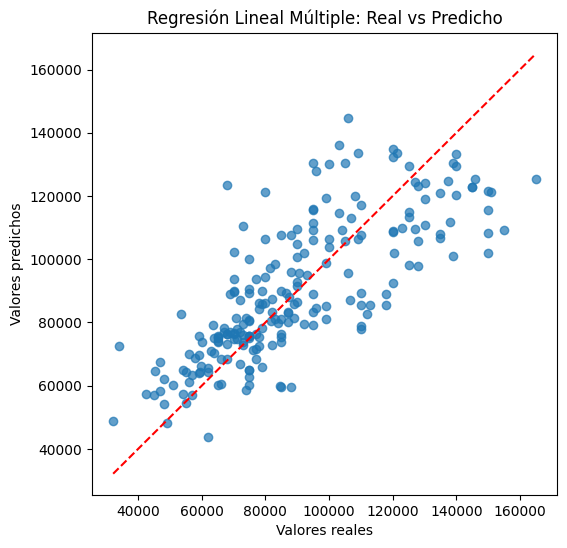

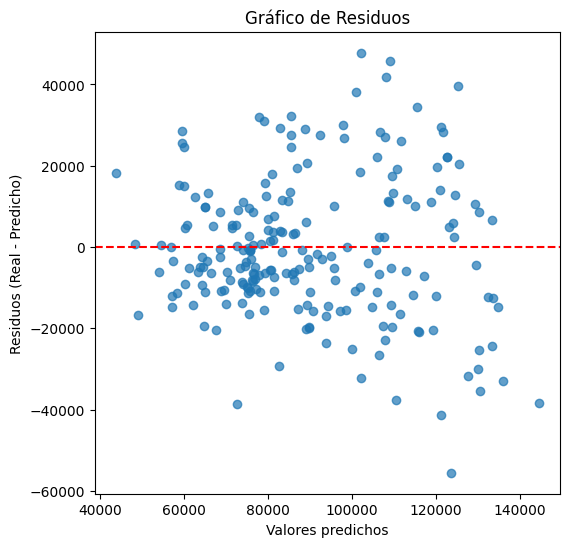

In [25]:
import matplotlib.pyplot as plt

# --- 1. Gr√°fico Real vs Predicho ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # l√≠nea ideal
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Regresi√≥n Lineal M√∫ltiple: Real vs Predicho")
plt.show()

# --- 2. Gr√°fico de Residuos ---
residuos = y_test - y_pred

plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos (Real - Predicho)")
plt.title("Gr√°fico de Residuos")
plt.show()


In [26]:
# cu√°nto influye cada variable en el precio
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": model.coef_
})
print(coeficientes.sort_values(by="Coeficiente", ascending=False))

                 Variable   Coeficiente
6       N√∫mero de garajes   6649.825308
5         N√∫mero de ba√±os   2729.044118
3             Superficie     964.471254
8      A√±os de antig√ºedad   -214.620388
1               Trimestre   -418.743615
7       Piso de ubicaci√≥n   -614.821230
0                     A√±o   -883.518353
4  N√∫mero de habitaciones  -1755.934974
2          Tipo de cambio -12287.845793


In [27]:
import joblib

# Guardar el modelo entrenado en un archivo .pkl
joblib.dump(model, "dataset_los_olivos.pkl")

['dataset_los_olivos.pkl']

In [28]:
!ls

BELLAVISTA
MAGDALENA
dataset_bellavista.ipynb
dataset_bellavista.pkl
dataset_bellavista.xlsx
dataset_los_olivos.ipynb
dataset_los_olivos.pkl
dataset_los_olivos.xlsx
dataset_magdalena.xlsx


---

---

In [29]:
# Cargar el modelo desde el archivo .pkl
modelo_cargado = joblib.load("dataset_los_olivos.pkl")

# Ahora puedes usarlo directamente
y_pred = modelo_cargado.predict(X_test)

In [30]:
y_pred

array([ 93868.99801689,  78992.13500964, 108222.97963802,  54121.86489253,
        90714.71424143,  85417.60774996,  73779.17820382,  72489.05299301,
        73939.91912373,  56916.38077057, 102182.3795938 , 134721.36360632,
        65793.65270886,  60226.46353365,  71546.84182482,  61191.78164755,
        74019.65270138, 109806.32821001, 130285.85492867,  89293.0825078 ,
       114937.7249502 ,  75178.30245354,  67513.8396519 ,  64337.89404489,
        74843.28522505,  76463.96848228,  72960.32184605,  65548.03489627,
       116008.22823179, 123545.88902168,  88088.88956938, 133742.28960399,
       129446.07250458,  65081.07592022,  85747.75202972, 107609.29073326,
        75751.56707629, 122762.12567317, 119379.10129486, 122759.52701289,
        59468.64294627, 136032.68931007, 144520.86796458,  75570.58258428,
        85364.11213358,  86112.21800434,  85897.59761597, 129498.96423448,
        89852.59178229,  85531.45438884,  82795.92325587,  82956.65859944,
       108876.57928418, 1

In [31]:
X_test

A√±o  Trimestre  Tipo de cambio  Superficie   N√∫mero de habitaciones  \
423   2022          3        3.891228           97                       3   
548   2023          2        3.699146           75                       3   
731   2024          1        3.759223          107                       3   
588   2023          2        3.699146           50                       2   
1052  2025          1        3.699348           89                       3   
...    ...        ...             ...          ...                     ...   
916   2024          3        3.757980          106                       3   
753   2024          1        3.759223           52                       2   
409   2022          3        3.891228          105                       3   
275   2022          1        3.806333           74                       3   
1009  2024          4        3.755779           78                       3   

      N√∫mero de ba√±os  N√∫mero de garajes  Piso de ubicaci√≥n  \
423                 1                  0                0.0   
548                 2                  0                0.0   
731                 2                  0                0.0   
588                 1                  0                0.0   
1052                2                  0                0.0   
...               ...                ...                ...   
916                 1                  0                0.0   
753                 2                  0                0.0   
409                 2                  2                0.0   
275                 2                  0                0.0   
1009                2                  1                2.0   

      A√±os de antig√ºedad  
423                   16  
548                    8  
731                   10  
588                    7  
1052                  10  
...                  ...  
916                    0  
753                    9  
409                   10  
275                    7  
1009                   9  

[217 rows x 9 columns]

---